In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot, Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv2D, LSTM
from sklearn.model_selection import train_test_split

In [2]:
text_data = pd.read_csv("hinglish_sentiment_data.csv")

In [3]:
text_data.shape

(2999, 2)

In [4]:
text_data.head()

,sentiment,text
0,neutral,_ Agr kse ko itni importantce chaeay ni tou ...
1,negative,logon ko alloo pyaz tomator me toh allah pak k...
2,negative,Wafadaar bane rahane ka nayab tarika hai lamb...
3,negative,Chup bhosdike . He has been exonerated of al...
4,positive,à¨¦à¨¾à¨¤à¨¾ à¨¸à:copyright:‹ à¨¸à¨¾à¨²à¨¾à¨...


In [5]:
text_data.isnull().any()

sentiment    False
text         False
dtype: bool

In [6]:
text_data["text"][2]

' Wafadaar bane rahane ka nayab tarika hai lamba ji aap us party se Judi hai jiska sardar  â€¦  // t . co / krVTd1ZAEK  '

In [7]:
TAG_RE = re.compile(r'<[^>]+>')

In [8]:
def remove_tags(text):
  """ Removing HTML Tags ; Replace anything btw opening and closing with empty spaces """

  return TAG_RE.sub(' ', text)

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ameen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
class CustomPreprocess():
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    def __init__(self):
        pass

    def preprocess_text(self,sen):
        if sen == 'str':
          sen = sen.lower()
        else:
          pass
        
        # Remove html tags
        sentence = remove_tags(sen)

        # Remove punctuations and numbers
        sentence = re.sub('[^a-zA-Z]', ' ', sentence)
        
        # Single character removal
        sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

        # Remove multiple spaces
        sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
        
        # Remove Stopwords
        pattern = re.compile(r'\b(' + r'|'.join(stopwords_list) + r')\b\s*')
        sentence = pattern.sub('', sentence)
        
        return sentence

In [11]:
# Calling preprocessing_text function on movie_reviews
custom = CustomPreprocess()
stopwords_list = set(stopwords.words('english'))
X = []
sentences = list(text_data['text'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

In [86]:
print(type(X))

<class 'list'>


In [89]:
# Sample cleaned up movie review
X[2]
np.array(X)

array([' Agr kse ko itni importantce chaeay ni tou ',
       'logon ko alloo pyaz tomator toh allah pak ka naam nazar aa jata hai pr aankhon samne allah pak ke bande nazar co hBg zS viy ',
       ' Wafadaar bane rahane ka nayab tarika hai lamba ji aap us party se Judi hai jiska sardar co krVTd ZAEK ',
       ...,
       ' trade mark trade mark trade mark da realest Thank putting track Can wait next one soon trade mark co psjvYboEVh ',
       ' Khan Fahad Bhaiiiii give us Bilal Abbas We wait anymore BilalAbbasOnJeetoPakistan khan ',
       ' tbh bad sides say bad horribly bad '], dtype='<U193')

In [90]:
# Converting sentiment labels to 0 & 1
from sklearn.preprocessing import LabelEncoder

y = text_data['sentiment']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels into label encoding
y = label_encoder.fit_transform(y)

In [91]:
print(type(y))

<class 'numpy.ndarray'>


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# The train set will be used to train our deep learning models
# while test set will be used to evaluate how well our model performs

#### Preparing Embedding Layer
Let's now write the script for our embedding layer. Embedding layer converts our textual data into numeric form. It is then used as the first layer for the deep learning models in Keras.

In [93]:
# Embedding layer expects the words to be in numeric form
# Using Tokenizer function from keras.preprocessing.text library
# Method fit_on_text trains the tokenizer
# Method texts_to_sequences converts sentences to their numeric form

word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [94]:
X_train

[[3553, 3554, 74, 142, 2088, 2089, 8, 3555, 343, 384, 3556, 1460, 3557],
 [2090,
  2091,
  20,
  52,
  2092,
  5,
  29,
  3558,
  45,
  16,
  9,
  19,
  143,
  29,
  2093,
  2094,
  16,
  2,
  1,
  3559,
  3560],
 [44, 91, 37, 74, 277, 142, 903, 3561, 3562, 112, 653, 772, 1, 3563, 3564],
 [54, 2095, 236, 1124, 15, 14, 513, 1125, 3565],
 [30,
  773,
  251,
  654,
  38,
  3566,
  1126,
  263,
  7,
  3567,
  3568,
  3569,
  198,
  3570,
  2,
  12,
  237,
  1127,
  39,
  3,
  582,
  22,
  132,
  1,
  3571,
  3572],
 [24, 344, 3573, 583, 169, 71, 3574, 3575, 514],
 [95, 101, 2096, 3576, 3577, 3578, 655, 3579, 3580, 41, 38, 3581],
 [22,
  34,
  264,
  3582,
  774,
  4,
  1461,
  2097,
  2098,
  3583,
  2099,
  3584,
  1,
  3585,
  3586],
 [90, 3587, 2100, 3588, 117, 138, 3589, 170, 153, 3590, 2],
 [3591,
  160,
  1128,
  3,
  121,
  7,
  51,
  34,
  278,
  18,
  21,
  7,
  1129,
  3592,
  8,
  3593,
  12,
  2101,
  1,
  3594,
  3595],
 [3596, 3597, 107, 71, 904, 1462, 171, 24, 462, 279, 3598

In [95]:
import io
import json
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [96]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

# Padding all reviews to fixed length 100
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [97]:
X_train

array([[ 3553,  3554,    74, ...,     0,     0,     0],
       [ 2090,  2091,    20, ...,     0,     0,     0],
       [   44,    91,    37, ...,     0,     0,     0],
       ...,
       [   46,    41,   664, ...,     0,     0,     0],
       [   21, 11764,  2229, ...,     0,     0,     0],
       [  578,   131, 11769, ...,     0,     0,     0]])

In [98]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Create Embedding Matrix having 100 columns
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(11773, 100)

### Model Training

##### Simple Neural Network

In [99]:
### Simple Neural Network

# Neural Network architecture

snn_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

snn_model.add(embedding_layer)

snn_model.add(Flatten())
snn_model.add(Dense(1, activation='sigmoid'))
# Model compiling

snn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

print(snn_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 100)          1177300   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_6 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 1,187,301
Trainable params: 10,001
Non-trainable params: 1,177,300
_________________________________________________________________
None


In [100]:
# Model training

snn_model_history = snn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
15/15 [==============================] - 1s 33ms/step - loss: 0.3429 - acc: 0.3887 - val_loss: 0.1721 - val_acc: 0.3792
Epoch 2/6
15/15 [==============================] - 0s 11ms/step - loss: -0.1465 - acc: 0.4054 - val_loss: -0.1162 - val_acc: 0.3833
Epoch 3/6
15/15 [==============================] - 0s 9ms/step - loss: -0.4728 - acc: 0.4112 - val_loss: -0.3661 - val_acc: 0.3854
Epoch 4/6
15/15 [==============================] - 0s 12ms/step - loss: -0.7665 - acc: 0.4122 - val_loss: -0.5960 - val_acc: 0.3938
Epoch 5/6
15/15 [==============================] - 0s 12ms/step - loss: -1.0462 - acc: 0.4200 - val_loss: -0.8014 - val_acc: 0.3896
Epoch 6/6
15/15 [==============================] - 0s 11ms/step - loss: -1.3178 - acc: 0.4263 - val_loss: -1.0076 - val_acc: 0.3917


In [101]:
# Predictions on the Test Set

score = snn_model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 0s 3ms/step - loss: -0.9650 - acc: 0.4033


In [102]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: -0.964962899684906
Test Accuracy: 0.4033333361148834


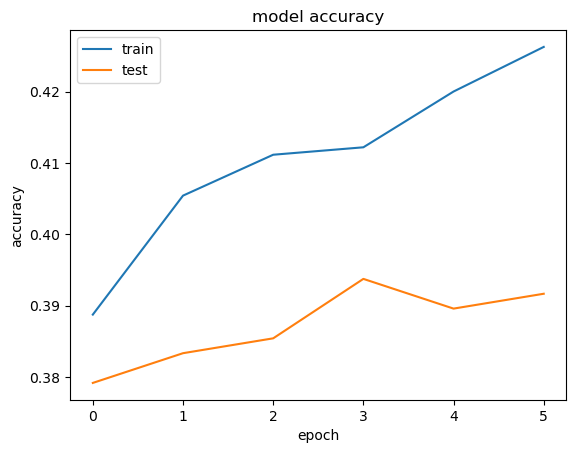

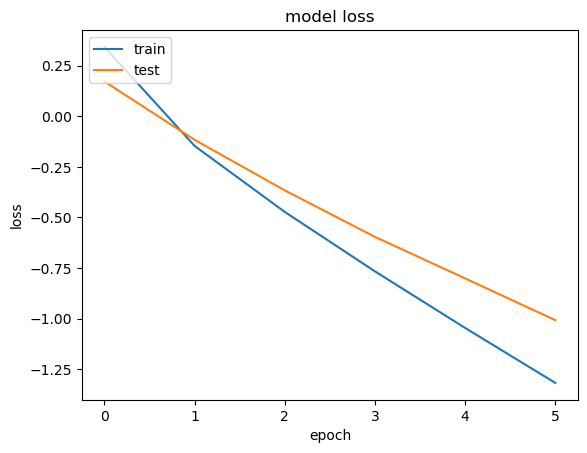

In [103]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

#### Convolutional Neural Network

In [104]:
from keras.layers import Conv1D
# Neural Network architecture

cnn_model = Sequential()

embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
cnn_model.add(embedding_layer)

cnn_model.add(Conv1D(128, 5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(1, activation='sigmoid'))
# Model compiling

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(cnn_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          1177300   
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,241,557
Trainable params: 64,257
Non-trainable params: 1,177,300
_________________________________________________________________
None


In [105]:
# Model training

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
15/15 [==============================] - 2s 83ms/step - loss: -0.4806 - acc: 0.4065 - val_loss: -0.9686 - val_acc: 0.3875
Epoch 2/6
15/15 [==============================] - 1s 64ms/step - loss: -2.2133 - acc: 0.4028 - val_loss: -2.5503 - val_acc: 0.4083
Epoch 3/6
15/15 [==============================] - 1s 66ms/step - loss: -4.2708 - acc: 0.4065 - val_loss: -4.6054 - val_acc: 0.4104
Epoch 4/6
15/15 [==============================] - 1s 78ms/step - loss: -7.0955 - acc: 0.4059 - val_loss: -7.2445 - val_acc: 0.4083
Epoch 5/6
15/15 [==============================] - 1s 64ms/step - loss: -10.7303 - acc: 0.4096 - val_loss: -10.6638 - val_acc: 0.4187
Epoch 6/6
15/15 [==============================] - 1s 71ms/step - loss: -15.0252 - acc: 0.4059 - val_loss: -14.7802 - val_acc: 0.4083


In [106]:
# Predictions on the Test Set

score = cnn_model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 0s 9ms/step - loss: -15.8813 - acc: 0.4067


In [107]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: -15.881251335144043
Test Accuracy: 0.40666666626930237


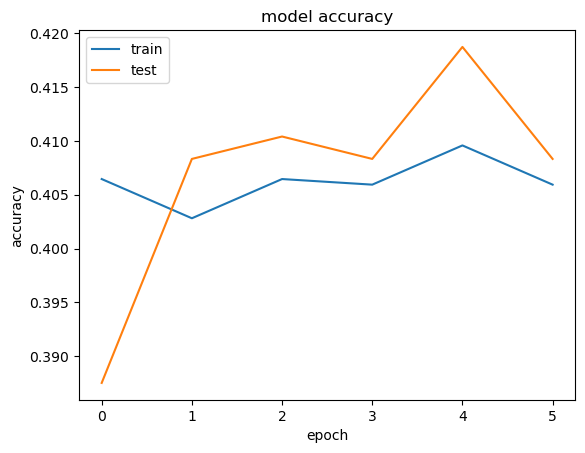

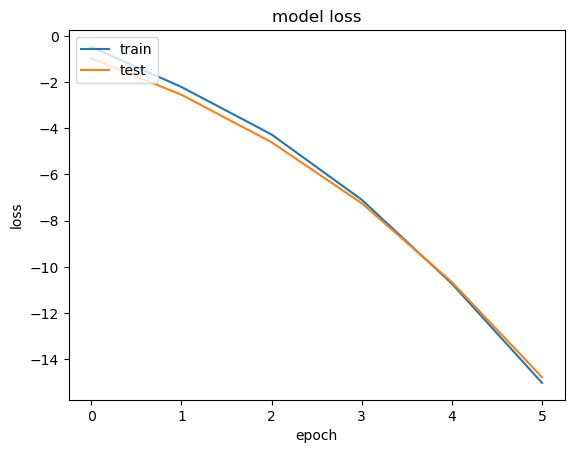

In [108]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

#### Recurrent Neural Network (LSTM)

In [109]:
from keras.layers import LSTM
# Neural Network architecture

lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(1, activation='sigmoid'))
# Model compiling

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(lstm_model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          1177300   
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,294,677
Trainable params: 117,377
Non-trainable params: 1,177,300
_________________________________________________________________
None


In [110]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
15/15 [==============================] - 10s 481ms/step - loss: 0.4337 - acc: 0.4002 - val_loss: 0.0327 - val_acc: 0.4083
Epoch 2/6
15/15 [==============================] - 5s 354ms/step - loss: -0.5696 - acc: 0.4018 - val_loss: -1.0866 - val_acc: 0.4313
Epoch 3/6
15/15 [==============================] - 4s 290ms/step - loss: -1.0795 - acc: 0.4002 - val_loss: -1.2283 - val_acc: 0.4333
Epoch 4/6
15/15 [==============================] - 4s 273ms/step - loss: -2.0561 - acc: 0.4424 - val_loss: -1.5913 - val_acc: 0.4375
Epoch 5/6
15/15 [==============================] - 4s 283ms/step - loss: -2.3764 - acc: 0.4377 - val_loss: -1.8593 - val_acc: 0.4354
Epoch 6/6
15/15 [==============================] - 4s 298ms/step - loss: -2.6505 - acc: 0.4362 - val_loss: -1.9754 - val_acc: 0.4333


In [111]:
# Predictions on the Test Set
score = lstm_model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 1s 43ms/step - loss: -1.9863 - acc: 0.4117


In [112]:
# Model Performance
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: -1.9862751960754395
Test Accuracy: 0.4116666615009308


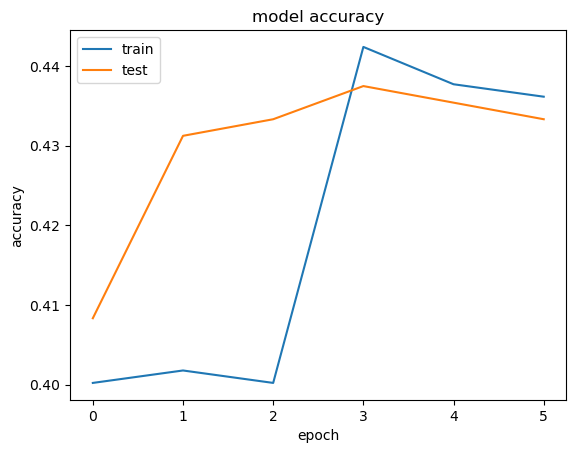

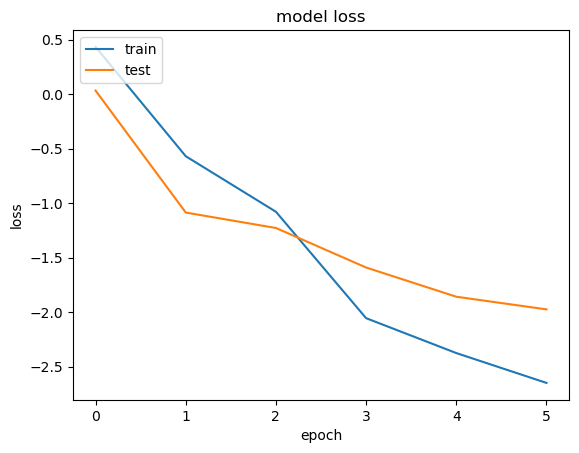

In [113]:
# Model Performance Charts
import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [114]:
# Saving the model as a h5 file for possible use later

lstm_model.save(f"./sentiment_lstm_model_acc_{round(score[1], 3)}.h5", save_format='h5')

In [115]:
# Load previously trained LSTM Model

from keras.models import load_model

model_path ='sentiment_lstm_model_acc_1.0.h5'
pretrained_lstm_model = load_model(model_path)

# summarize model.
pretrained_lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1177300   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,294,677
Trainable params: 117,377
Non-trainable params: 1,177,300
_________________________________________________________________


In [116]:
# Preprocess review text with earlier defined preprocess_text function
unseen_reviews = "Hello this"
unseen_processed = []
for review in unseen_reviews:
  review = custom.preprocess_text(review)
  unseen_processed.append(review)

In [117]:
from keras_preprocessing.text import tokenizer_from_json
# Loading
with open('b3_tokenizer.json') as f:
    data = json.load(f)
    loaded_tokenizer = tokenizer_from_json(data)

In [118]:
# Tokenising instance with earlier trained tokeniser
unseen_tokenized = loaded_tokenizer.texts_to_sequences(unseen_processed)

In [119]:
# Pooling instance to have maxlength of 100 tokens
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)
unseen_padded

array([[2561,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [ 774,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    

In [ ]:
# Calling preprocessing_text function on movie_reviews
custom = CustomPreprocess()
stopwords_list = set(stopwords.words('english'))
X = []
sentences = list(text_data['text'])
for sen in sentences:
    X.append(custom.preprocess_text(sen))

In [122]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")
#%%
def sentiment_predictor(input):
    input = custom.preprocess_text(input)
#     transformed_input = cv.transform(input)
    prediction = lstm_mpdel.predict(transformed_input)
    expression_check(prediction)
#%%
input1 = ["Sometimes I just want to punch someone in the face."]
input2 = ["I bought a new phone and it's so good."]
sentiment_predictor(input1)
sentiment_predictor(input2)

TypeError: expected string or bytes-like object